In [1]:
# import packages
import numpy as np
import pandas as pd
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [16]:
# Path to the folder containing the chunked data
data_folder = "../data/"
output_folder = "../output/"

# Load data
yield_curve_parameters = pd.read_excel(data_folder + "RS Yield Curve Parameters.xlsx")

In [3]:
data = yield_curve_parameters.copy()
data.drop('YieldCurveCode', axis=1, inplace=True)

# Get the current date and time
current_time = dt.datetime.now()

# Format the timestamp 
today = current_time.strftime("%Y-%m-%d")

today_stamp = dt.datetime.strptime(today, '%Y-%m-%d')

data ['TradingDate'] = pd.to_datetime(data['TradingDate'])
data ['DaysSince'] = today_stamp - data ['TradingDate']

# Convert datetime column to integer (number of days)
data ['DaysSince'] = data ['DaysSince'].dt.days

In [4]:
data.head()

,TradingDate,Beta0,Beta1,Beta2,Beta3,Tau1,Tau2,DaysSince
0,2011-05-11,17.109374,-15.434504,-17.311269,10.820827,0.872303,5.460506,4430
1,2011-05-12,17.079529,-15.427662,-17.348751,11.211889,0.872303,5.460506,4429
2,2011-05-13,17.064811,-14.993872,-19.416770,11.466549,0.840827,4.979788,4428
3,2011-05-16,17.928125,-16.926999,-16.387034,11.178023,1.059392,3.447768,4425
4,2011-05-17,17.773915,-17.303073,-12.825580,10.174530,1.059392,3.447768,4424


In [11]:
# m = {1d, 1m, 3m, 6m, 9m, 1y, 1.5y, 2y, 3y, 4y, 5y, 6y, 7y, 8y, 9y, 10y, 15y, 20y} 
maturity_names = ['1d', '1m', '3m', '6m', '9m', '1y', '1.5y', '2y', '3y', '4y', '5y', '6y', '7y', '8y', '9y', '10y', '15y', '20y'] 
maturities = [1, 30, 90, 180, 270, 360, 540, 720, 1080, 1440, 1800, 2160, 2520, 2880, 3240, 3600, 5400, 7200]
maturities_yr = [x / 360 for x in maturities]

In [6]:
output = pd.DataFrame()
output['t'] = data ['TradingDate']

for m in maturities_yr:
    output [str(m)] = data ['Beta0'] + data ['Beta1'] * ((1-np.exp(-m/data ['Tau1']))/(m/data ['Tau1'])) + data ['Beta2'] * ((1-np.exp(-m/data ['Tau1']))/(m/data ['Tau1'])-np.exp(-m/data ['Tau1'])) + data ['Beta3'] * ((1-np.exp(-m/data ['Tau2']))/(m/data ['Tau2'])-np.exp(-m/data ['Tau2'])) 

In [7]:
# Transpose the dataframe
transposed_output = output.drop('t', axis=1).transpose()

In [12]:
# Add t to maturity names 
maturity_names.insert(0, 't')

In [13]:
output.columns = maturity_names
output

,t,1d,1m,3m,6m,9m,1y,1.5y,2y,3y,4y,5y,6y,7y,8y,9y,10y,15y,20y
0,2011-05-11,1.674665,1.694854,1.875927,2.410353,3.148909,4.001308,5.819190,7.575934,10.527692,12.687362,14.227617,15.330989,16.131623,16.720019,17.156479,17.481808,18.197829,18.281995
1,2011-05-12,1.651692,1.672809,1.856268,2.395165,3.138895,3.996864,5.826253,7.594174,10.565549,12.740540,14.292184,15.403692,16.209857,16.801726,17.240044,17.565974,18.274359,18.344807
2,2011-05-13,2.066873,1.983965,1.999495,2.378081,3.037183,3.858974,5.693739,7.508191,10.575804,12.806582,14.378776,15.489341,16.282703,16.855656,17.272328,17.575911,18.191442,18.215106
3,2011-05-16,1.006353,1.170998,1.581659,2.330103,3.180070,4.082891,5.916565,7.657717,10.604820,12.794171,14.357415,15.457915,16.230359,16.773486,17.156591,17.427617,17.967259,18.050813
4,2011-05-17,0.480818,0.776132,1.417397,2.427463,3.459542,4.484266,6.437454,8.196556,11.049606,13.103317,14.545994,15.552461,16.255161,16.747597,17.094125,17.338792,17.823281,17.895899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,2023-06-07,0.020348,0.589983,1.653206,2.985856,4.046220,4.875840,5.980796,6.530412,6.594529,5.943901,5.036142,4.099972,3.240832,2.499391,1.883609,1.386044,0.172690,0.043272
3035,2023-06-08,0.020348,0.589983,1.653206,2.985856,4.046220,4.875840,5.980796,6.530412,6.594529,5.943901,5.036142,4.099972,3.240832,2.499391,1.883609,1.386044,0.172690,0.043272
3036,2023-06-09,0.020348,0.589983,1.653206,2.985856,4.046220,4.875840,5.980796,6.530412,6.594529,5.943901,5.036142,4.099972,3.240832,2.499391,1.883609,1.386044,0.172690,0.043272
3037,2023-06-12,0.266593,0.789317,1.765714,2.991347,3.968749,4.735719,5.763838,6.284599,6.377671,5.811059,5.000941,4.155719,3.372006,2.687721,2.111146,1.636571,0.372853,0.071192


In [17]:
# Save files as:
filename = 'BAM_YTM.csv'

output.to_csv(output_folder + filename, index=False)

In [14]:
# Assign numeric column names
transposed_output.columns = range(1, len(transposed_output.columns) + 1)
transposed_output

,1,2,3,4,5,6,7,8,9,10,...,3030,3031,3032,3033,3034,3035,3036,3037,3038,3039
0.002777777777777778,1.674665,1.651692,2.066873,1.006353,0.480818,1.405882,1.321039,1.088232,2.123625,1.247545,...,0.020348,0.020348,0.020348,0.020348,0.020348,0.020348,0.020348,0.020348,0.266593,0.266593
0.08333333333333333,1.694854,1.672809,1.983965,1.170998,0.776132,1.478671,1.403191,1.209921,2.036849,1.350718,...,0.589983,0.589983,0.589983,0.589983,0.589983,0.589983,0.589983,0.589983,0.789317,0.789317
0.25,1.875927,1.856268,1.999495,1.581659,1.417397,1.761552,1.706031,1.578426,2.036794,1.654159,...,1.653206,1.653206,1.653206,1.653206,1.653206,1.653206,1.653206,1.653206,1.765714,1.765714
0.5,2.410353,2.395165,2.378081,2.330103,2.427463,2.429205,2.402269,2.342502,2.381655,2.283943,...,2.985856,2.985856,2.985856,2.985856,2.985856,2.985856,2.985856,2.985856,2.991347,2.991347
0.75,3.148909,3.138895,3.037183,3.180070,3.459542,3.276970,3.274343,3.257649,3.004208,3.054786,...,4.046220,4.046220,4.046220,4.046220,4.046220,4.046220,4.046220,4.046220,3.968749,3.968749
1.0,4.001308,3.996864,3.858974,4.082891,4.484266,4.215735,4.231932,4.242723,3.792934,3.908167,...,4.875840,4.875840,4.875840,4.875840,4.875840,4.875840,4.875840,4.875840,4.735719,4.735719
1.5,5.819190,5.826253,5.693739,5.916565,6.437454,6.147409,6.185165,6.225618,5.582478,5.703368,...,5.980796,5.980796,5.980796,5.980796,5.980796,5.980796,5.980796,5.980796,5.763838,5.763838
2.0,7.575934,7.594174,7.508191,7.657717,8.196556,7.957702,8.000335,8.055045,7.382006,7.454157,...,6.530412,6.530412,6.530412,6.530412,6.530412,6.530412,6.530412,6.530412,6.284599,6.284599
3.0,10.527692,10.565549,10.575804,10.604820,11.049606,10.910800,10.938816,11.007173,10.485806,10.477516,...,6.594529,6.594529,6.594529,6.594529,6.594529,6.594529,6.594529,6.594529,6.377671,6.377671
4.0,12.687362,12.740540,12.806582,12.794171,13.103317,13.010337,13.018859,13.091482,12.794611,12.754844,...,5.943901,5.943901,5.943901,5.943901,5.943901,5.943901,5.943901,5.943901,5.811059,5.811059


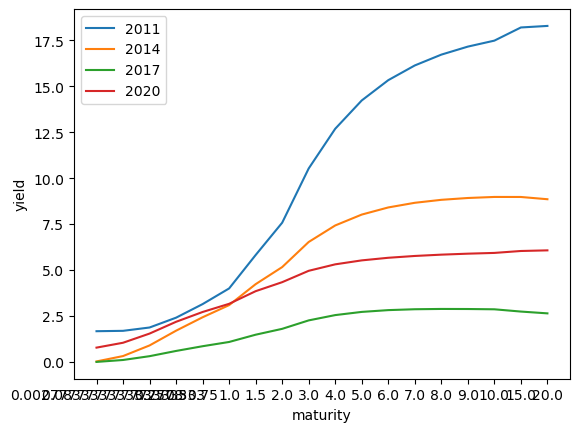

In [15]:
# Plot the vectors
plt.plot(transposed_output[1], label='2011')
plt.plot(transposed_output[1000], label='2014')
plt.plot(transposed_output[2000], label='2017')
plt.plot(transposed_output[3000], label='2020')

# Add labels and legend
plt.xlabel('maturity')
plt.ylabel('yield')
plt.legend()

# Display the plot
plt.show()